In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('keyword_extract.csv')

In [3]:
df.head()

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores
0,0,500100,disconnectors suitable for s3cd 362 1250,"[('suitable', 0.3382), ('1250', 0.5676), ('s3c..."
1,8,500100,freight prepaid cargo is stowed in a refrigera...,"[('1840 bags kg', 0.3781), ('firbinogen hc 500..."
2,23,500100,705 ctn 12 488 dz prs 2700 dz prs 70 cotton ...,"[('cotton 25 pvc', 0.4001), ('polyester 37 cot..."
3,25,500100,other suitable for furnit ureother suitable ...,"[('suitable', 0.4642), ('furnit', 0.5218), ('u..."
4,26,500100,tunnel warmer suitable tunnel warmer suitable ...,"[('250 cpm', 0.3962), ('cpm aluminum', 0.4251)..."


In [4]:
import ast
df['Keywords'] = df['Keyword_with_Scores'].apply(lambda x:  ast.literal_eval(x))

In [5]:
df.head()

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords
0,0,500100,disconnectors suitable for s3cd 362 1250,"[('suitable', 0.3382), ('1250', 0.5676), ('s3c...","[(suitable, 0.3382), (1250, 0.5676), (s3cd 362..."
1,8,500100,freight prepaid cargo is stowed in a refrigera...,"[('1840 bags kg', 0.3781), ('firbinogen hc 500...","[(1840 bags kg, 0.3781), (firbinogen hc 500, 0..."
2,23,500100,705 ctn 12 488 dz prs 2700 dz prs 70 cotton ...,"[('cotton 25 pvc', 0.4001), ('polyester 37 cot...","[(cotton 25 pvc, 0.4001), (polyester 37 cotton..."
3,25,500100,other suitable for furnit ureother suitable ...,"[('suitable', 0.4642), ('furnit', 0.5218), ('u...","[(suitable, 0.4642), (furnit, 0.5218), (ureoth..."
4,26,500100,tunnel warmer suitable tunnel warmer suitable ...,"[('250 cpm', 0.3962), ('cpm aluminum', 0.4251)...","[(250 cpm, 0.3962), (cpm aluminum, 0.4251), (t..."


In [6]:
def extract_keywords(keyword_score_list):
    phrase_list = []
    if len(keyword_score_list) > 0:
        for keyword in keyword_score_list:
            if keyword[1] >= 0.1:
                phrase_list.append(keyword[0])
        phrase_non_unique = " ".join(phrase_list)
        unique_words = set(phrase_non_unique.split(' '))
        phrase = list(unique_words)

        return phrase
    else:
        return ""

In [7]:
df['HS_Code'] = df['HS_Code'].astype(str)

In [8]:
df['Keyword'] = df['Keywords'].apply(extract_keywords)

In [9]:
df.head()

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords,Keyword
0,0,500100,disconnectors suitable for s3cd 362 1250,"[('suitable', 0.3382), ('1250', 0.5676), ('s3c...","[(suitable, 0.3382), (1250, 0.5676), (s3cd 362...","[1250, suitable, disconnectors, 362, s3cd]"
1,8,500100,freight prepaid cargo is stowed in a refrigera...,"[('1840 bags kg', 0.3781), ('firbinogen hc 500...","[(1840 bags kg, 0.3781), (firbinogen hc 500, 0...","[500, kg, bags, hc, firbinogen, 1840, plasma, ..."
2,23,500100,705 ctn 12 488 dz prs 2700 dz prs 70 cotton ...,"[('cotton 25 pvc', 0.4001), ('polyester 37 cot...","[(cotton 25 pvc, 0.4001), (polyester 37 cotton...","[dz, 275, 10hstmkw, 25, 500, oz, ladies, 8njrl..."
3,25,500100,other suitable for furnit ureother suitable ...,"[('suitable', 0.4642), ('furnit', 0.5218), ('u...","[(suitable, 0.4642), (furnit, 0.5218), (ureoth...","[furnit, suitable, ureother]"
4,26,500100,tunnel warmer suitable tunnel warmer suitable ...,"[('250 cpm', 0.3962), ('cpm aluminum', 0.4251)...","[(250 cpm, 0.3962), (cpm aluminum, 0.4251), (t...","[aluminum, cans, cpm, 250, warmer, suitable, t..."


In [10]:
df[df['Keywords'].map(lambda d: len(d)) <= 0]

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords,Keyword
27,65,520819,oxford fabric,[],[],
68,114,520821,textiles,[],[],
83,138,520822,fabrics,[],[],
85,140,520822,ge optima,[],[],
93,148,520822,textiles,[],[],
...,...,...,...,...,...,...
21425,42510,550941,pva cloth,[],[],
21436,42540,550942,kynol fiber,[],[],
21437,42542,550942,kevlar black,[],[],
21440,42551,550942,kevlar,[],[],


In [11]:
df['Keyword'] = np.where(df['Keywords'].str.len() == 0, df['Description'].str.lower(), df['Keyword'])

In [12]:
df.head()

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords,Keyword
0,0,500100,disconnectors suitable for s3cd 362 1250,"[('suitable', 0.3382), ('1250', 0.5676), ('s3c...","[(suitable, 0.3382), (1250, 0.5676), (s3cd 362...","[1250, suitable, disconnectors, 362, s3cd]"
1,8,500100,freight prepaid cargo is stowed in a refrigera...,"[('1840 bags kg', 0.3781), ('firbinogen hc 500...","[(1840 bags kg, 0.3781), (firbinogen hc 500, 0...","[500, kg, bags, hc, firbinogen, 1840, plasma, ..."
2,23,500100,705 ctn 12 488 dz prs 2700 dz prs 70 cotton ...,"[('cotton 25 pvc', 0.4001), ('polyester 37 cot...","[(cotton 25 pvc, 0.4001), (polyester 37 cotton...","[dz, 275, 10hstmkw, 25, 500, oz, ladies, 8njrl..."
3,25,500100,other suitable for furnit ureother suitable ...,"[('suitable', 0.4642), ('furnit', 0.5218), ('u...","[(suitable, 0.4642), (furnit, 0.5218), (ureoth...","[furnit, suitable, ureother]"
4,26,500100,tunnel warmer suitable tunnel warmer suitable ...,"[('250 cpm', 0.3962), ('cpm aluminum', 0.4251)...","[(250 cpm, 0.3962), (cpm aluminum, 0.4251), (t...","[aluminum, cans, cpm, 250, warmer, suitable, t..."


In [13]:
df[df['Keyword'].map(lambda d: len(d)) <= 0]

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords,Keyword


In [15]:
df['HS_Code'] = df['HS_Code'].apply(lambda x: x[:4])

In [16]:
df.head()

,Unnamed: 0,HS_Code,Description,Keyword_with_Scores,Keywords,Keyword
0,0,5001,disconnectors suitable for s3cd 362 1250,"[('suitable', 0.3382), ('1250', 0.5676), ('s3c...","[(suitable, 0.3382), (1250, 0.5676), (s3cd 362...","[1250, suitable, disconnectors, 362, s3cd]"
1,8,5001,freight prepaid cargo is stowed in a refrigera...,"[('1840 bags kg', 0.3781), ('firbinogen hc 500...","[(1840 bags kg, 0.3781), (firbinogen hc 500, 0...","[500, kg, bags, hc, firbinogen, 1840, plasma, ..."
2,23,5001,705 ctn 12 488 dz prs 2700 dz prs 70 cotton ...,"[('cotton 25 pvc', 0.4001), ('polyester 37 cot...","[(cotton 25 pvc, 0.4001), (polyester 37 cotton...","[dz, 275, 10hstmkw, 25, 500, oz, ladies, 8njrl..."
3,25,5001,other suitable for furnit ureother suitable ...,"[('suitable', 0.4642), ('furnit', 0.5218), ('u...","[(suitable, 0.4642), (furnit, 0.5218), (ureoth...","[furnit, suitable, ureother]"
4,26,5001,tunnel warmer suitable tunnel warmer suitable ...,"[('250 cpm', 0.3962), ('cpm aluminum', 0.4251)...","[(250 cpm, 0.3962), (cpm aluminum, 0.4251), (t...","[aluminum, cans, cpm, 250, warmer, suitable, t..."


In [17]:
from sklearn import preprocessing

# Encoding the label
LabelEnc = preprocessing.LabelEncoder()
df['HS_Code_Encoded'] = LabelEnc.fit_transform(df['HS_Code'])

In [18]:
df.drop(columns=['Unnamed: 0','Description','Keyword_with_Scores','Keywords','HS_Code'], inplace=True)

In [19]:
df.head()

,Keyword,HS_Code_Encoded
0,"[1250, suitable, disconnectors, 362, s3cd]",0
1,"[500, kg, bags, hc, firbinogen, 1840, plasma, ...",0
2,"[dz, 275, 10hstmkw, 25, 500, oz, ladies, 8njrl...",0
3,"[furnit, suitable, ureother]",0
4,"[aluminum, cans, cpm, 250, warmer, suitable, t...",0


In [20]:
from gensim import models

# Loading the glove embeddings
glove_model = models.KeyedVectors.load_word2vec_format("glove.6B.200d.txt", binary=False, no_header=True)

In [21]:
# To replace the words with their indices in the dataset
def token_to_index_glove(token):
    try:
        return glove_model.key_to_index[token]
    except KeyError:
        return 0  # Index of 0 for unknown words

In [22]:
from sklearn.model_selection import train_test_split

model_selection = "glove"

# Splitting the dataset into training, validation and test sets
label_final = df['HS_Code_Encoded']
df_lyrics = df['Keyword']

df_indices = df_lyrics.apply(lambda x: [token_to_index_glove(token) for token in x])
df_train_valid, df_test, label_train_valid, label_test = train_test_split(df_indices.to_list(), label_final.to_list(), test_size=0.10, random_state=7)
df_train, df_valid, label_train, label_valid = train_test_split(df_train_valid, label_train_valid, test_size=0.10, random_state=7)

In [23]:
import torch
import copy
from torch.utils.data import Dataset
# Converting the dataframe into Torch's Text Dataset
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index]), torch.tensor(self.y[index])

train_dataset = TextDataset(df_train, label_train)
valid_dataset = TextDataset(df_valid, label_valid)
test_dataset = TextDataset(df_test, label_test)

In [24]:
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
from torch.utils.data import DataLoader
device = 'cpu'
batch_size = 32

# Splitting the dataset into batches and padding the vectors for equal length
def collate_batch(batch):
    X = [torch.tensor(item[0], dtype=torch.long) for item in batch]
    y = torch.tensor([item[1] for item in batch], dtype=torch.long)
    X_padded = rnn_utils.pad_sequence(X, batch_first=True, padding_value=0)
    lengths = torch.LongTensor([len(x) for x in X])
    return X_padded.to(device), y.to(device), lengths.to(device)

# DataLoader to load the data into the Torch Model
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)

In [25]:
# Defining the LSTM Model
class LSTM(nn.Module):
    def __init__(self, given_model, num_classes, hidden_size=64, num_layers=2):
        super(LSTM, self).__init__()
        self.embedding_dim = given_model.vector_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(given_model.vectors)) # Using the embeddings trained previously
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_size, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, lengths):
        x = self.embedding(x)
        x = self.dropout(x)
        #Packing the padded sequences for better computational performance
        packed_seq = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        _, (hidden, _) = self.lstm(packed_seq)
        output = self.fc(hidden[-1])
        return output.squeeze(0)

In [26]:
# Function to train the LSTM model and choose the best one based on validation performance
def train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy=0, best_weights=None):
    for epoch in range(num_epochs):
        print("Epoch :", epoch)
        model.train()
        training_loss = 0
        current_batch = 0
        for inputs, labels, lengths in train_loader:
            if current_batch % 500 == 0:
                print('Current batch: {} / {}'.format(current_batch + 1, len(train_loader)))
            current_batch += 1
            adam_optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            loss.backward()
            adam_optimizer.step()
            training_loss = training_loss + (loss.item() * inputs.size(0))
        training_loss = training_loss/len(train_loader.dataset)
        training_loss_list.append(training_loss)
        print("Training Loss: ", training_loss)

        # Testing performance on validation set
        model.eval()
        validation_loss = 0
        correct = 0
        total = 0
        current_batch = 0
        with torch.no_grad():
            for inputs, labels, lengths in valid_loader:
                if current_batch % 500 == 0:
                    print('Current batch: {} / {}'.format(current_batch+1, len(valid_loader)))
                current_batch += 1
                outputs = model(inputs, lengths)
                loss = loss_fn(outputs, labels)
                validation_loss = validation_loss + (loss.item()*inputs.size(0))
                _, predicted = outputs.max(1)
                total = total + labels.size(0)
                correct = correct + predicted.eq(labels).sum().item()
        validation_loss = validation_loss/len(valid_loader.dataset)
        validation_loss_list.append(validation_loss)
        validation_accuracy = correct/total
        validation_accuracy_list.append(validation_accuracy)

        # Get the best model parameters
        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            best_weights = copy.deepcopy(model.state_dict())

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.2f}%'
              .format(epoch+1, num_epochs, training_loss, validation_loss, 100*validation_accuracy))
    return best_weights

In [27]:
import torch.optim as optim
# Training model with glove embeddings
learning_rate = 0.001
num_epochs = 50
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

best_accuracy = 0
best_weights = None

model = LSTM(glove_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

best_weights=train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy, best_weights)
# Saving the best model parameters
model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'LSTM_with_glove.pth')

Epoch : 0
Current batch: 1 / 543


/var/folders/_h/c0v2f2b52tg3tbh0qt6x1lmw0000gn/T/ipykernel_98381/573424280.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 501 / 543
Training Loss:  3.6302100184434902
Current batch: 1 / 61
Epoch [1/50], Train Loss: 3.6302, Val Loss: 3.0978, Val Acc: 24.92%
Epoch : 1
Current batch: 1 / 543
Current batch: 501 / 543
Training Loss:  2.9043633748945803
Current batch: 1 / 61
Epoch [2/50], Train Loss: 2.9044, Val Loss: 2.6629, Val Acc: 34.20%
Epoch : 2
Current batch: 1 / 543
Current batch: 501 / 543
Training Loss:  2.5586355593499914
Current batch: 1 / 61
Epoch [3/50], Train Loss: 2.5586, Val Loss: 2.4416, Val Acc: 39.69%
Epoch : 3
Current batch: 1 / 543
Current batch: 501 / 543
Training Loss:  2.3440313076764303
Current batch: 1 / 61
Epoch [4/50], Train Loss: 2.3440, Val Loss: 2.3014, Val Acc: 42.18%
Epoch : 4
Current batch: 1 / 543
Current batch: 501 / 543
Training Loss:  2.173181025128604
Current batch: 1 / 61
Epoch [5/50], Train Loss: 2.1732, Val Loss: 2.2075, Val Acc: 44.09%
Epoch : 5
Current batch: 1 / 543
Current batch: 501 / 543
Training Loss:  2.042843181600443
Current batch: 1 / 61
Epoch

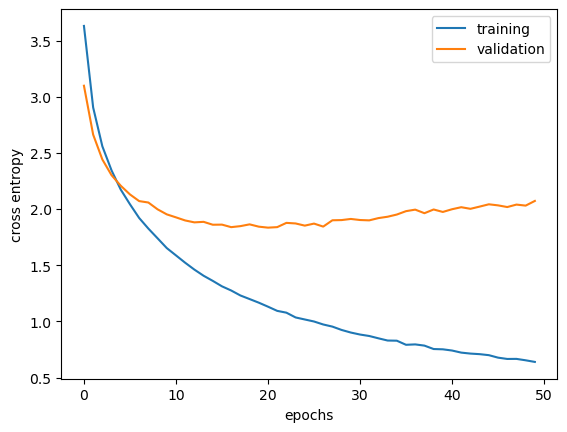

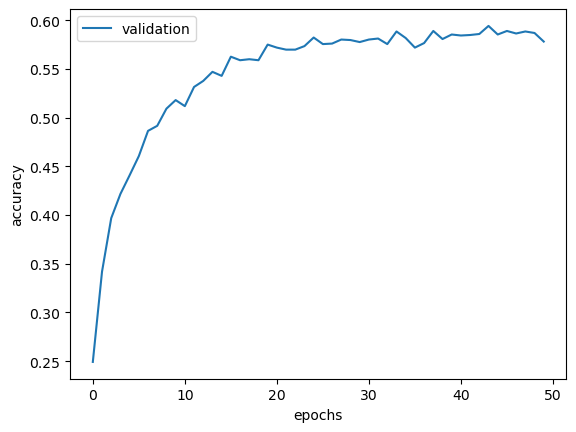

<Figure size 640x480 with 0 Axes>

In [28]:

import matplotlib.pyplot as plt

plt.plot(training_loss_list, label="training")
plt.plot(validation_loss_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
plt.savefig('Loss.png')

plt.plot(validation_accuracy_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy.png')

In [29]:
from sklearn.metrics import precision_recall_fscore_support
# Function to evaluate the model performance on the test set
def evaluate(model, loss_fn):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    current_batch = 0
    predicted_list = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels, lengths in valid_loader:
            if current_batch % 500 == 0:
                print('Current batch: {} / {}'.format(current_batch+1, len(valid_loader)))
            current_batch += 1
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            test_loss = test_loss + (loss.item()*inputs.size(0))
            _, predicted = outputs.max(1)
            total = total + labels.size(0)
            correct = correct + predicted.eq(labels).sum().item()
            predicted_list.extend(predicted.tolist())
            labels_list.extend(labels.tolist())
    test_loss = test_loss/len(valid_loader.dataset)
    test_accuracy = correct/total
    precision, recall, f1, _ = precision_recall_fscore_support(labels_list, predicted_list, average='weighted')

    print("Accuracy: ",test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1: ",f1)

In [30]:
# Testing model with glove embeddings
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

model = LSTM(glove_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)

loss_fn = nn.CrossEntropyLoss()
model.load_state_dict(torch.load('LSTM_with_glove.pth'))

<All keys matched successfully>

In [31]:
evaluate(model, loss_fn)

/var/folders/_h/c0v2f2b52tg3tbh0qt6x1lmw0000gn/T/ipykernel_98381/573424280.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 1 / 61
Accuracy:  0.5943005181347151
Precision:  0.5966205581998024
Recall:  0.5943005181347151
F1:  0.5851625805693362


/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
